# # Data cleaning and processing


In [5]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [6]:
dataset = pd.read_csv('../data/Churn.csv', sep=";")
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
dataset.shape

(999, 12)

In [8]:
dataset.columns = ["id", "Score", "State", "Gene", "Age", "Heritage", "Balance", "Products", "CreditCard", "Active", "Salary", "Left"]

In [9]:
dataset.head()

,id,Score,State,Gene,Age,Heritage,Balance,Products,CreditCard,Active,Salary,Left
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [10]:
agroup = dataset.groupby(["State"]).size()
agroup

State
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='State'>

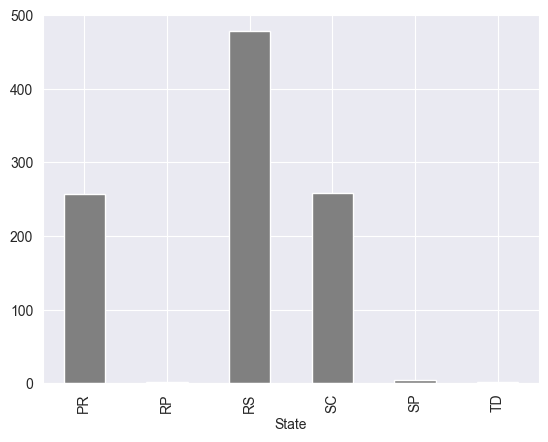

In [11]:
agroup.plot.bar(color = 'gray')

In [12]:
agroup = dataset.groupby(["Gene"]).size()
agroup

Gene
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Gene'>

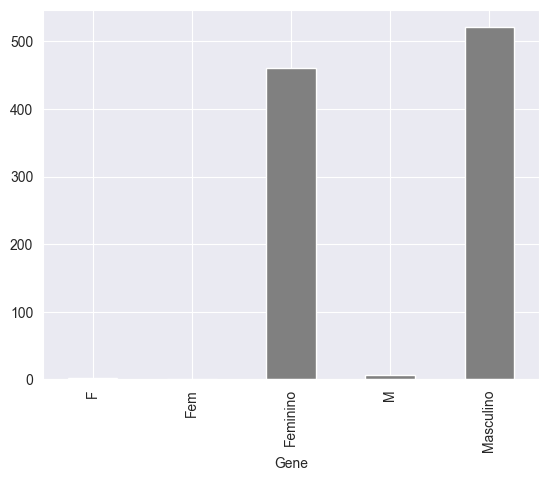

In [13]:
agroup.plot.bar(color = 'gray')

In [14]:
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

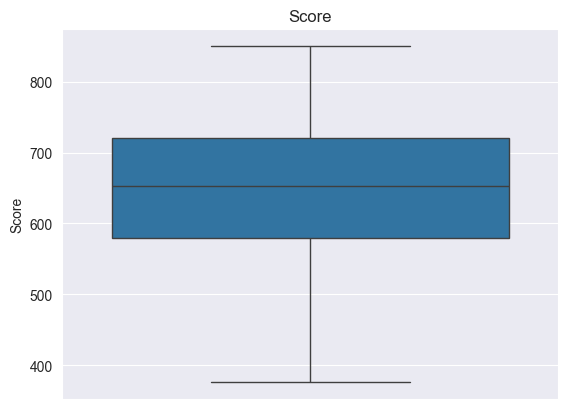

In [15]:
srn.boxplot(dataset['Score']).set_title('Score')

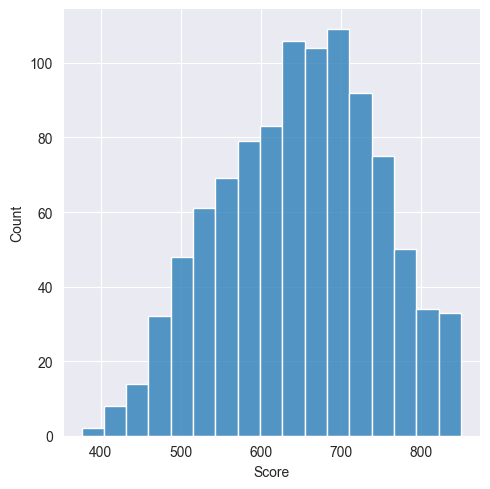

In [16]:
srn.displot(dataset['Score']).set_titles('Score')

In [17]:
dataset['Age'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age')

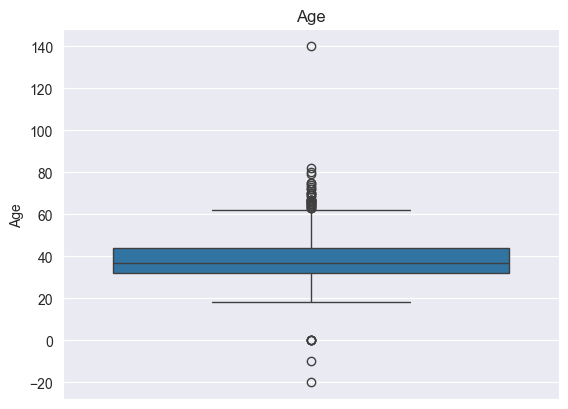

In [18]:
srn.boxplot(dataset['Age']).set_title('Age')

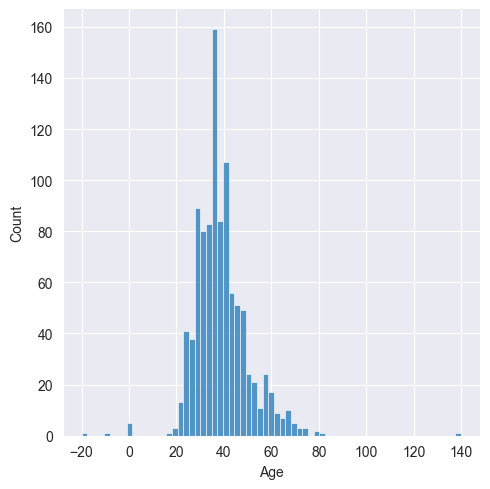

In [19]:
srn.displot(dataset['Age']).set_titles('Age')

In [20]:
dataset['Balance'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Balance, dtype: float64

Text(0.5, 1.0, 'Balance')

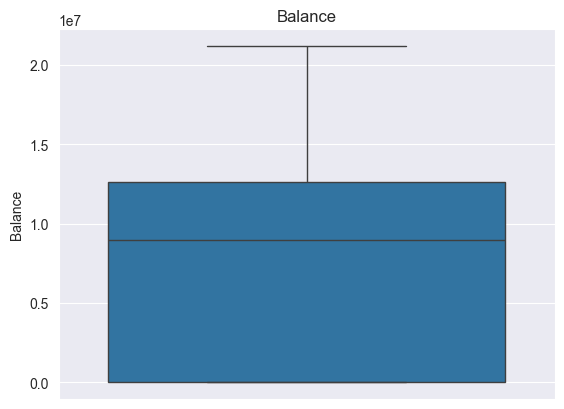

In [21]:
srn.boxplot(dataset['Balance']).set_title('Balance')

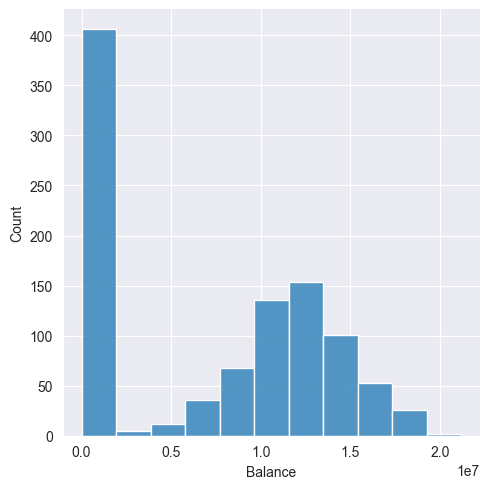

In [22]:
srn.displot(dataset['Balance']).set_titles('Balance')

In [23]:
dataset['Salary'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salary, dtype: float64

Text(0.5, 1.0, 'Salary')

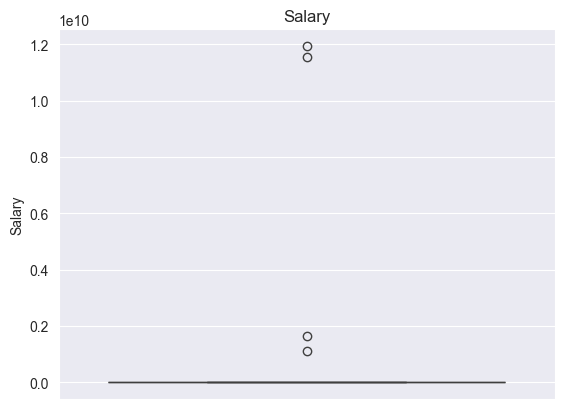

In [24]:
srn.boxplot(dataset['Salary']).set_title('Salary')

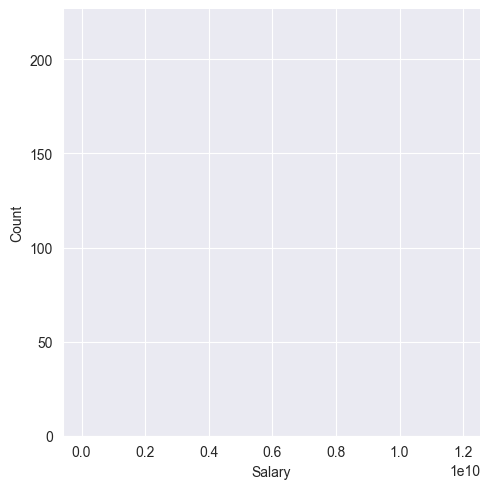

In [25]:
srn.displot(dataset['Salary']).set_titles('Salary')

In [26]:
dataset.isnull().sum()

id            0
Score         0
State         0
Gene          8
Age           0
Heritage      0
Balance       0
Products      0
CreditCard    0
Active        0
Salary        7
Left          0
dtype: int64

In [27]:
dataset['Salary'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salary, dtype: float64

In [28]:
med = sts.median(dataset['Salary'])
med

70518.0

In [29]:
dataset['Salary'] = dataset['Salary'].fillna(med)

In [30]:
dataset['Salary'].isnull().sum()

np.int64(0)

In [31]:
dataset.isnull().sum()

id            0
Score         0
State         0
Gene          8
Age           0
Heritage      0
Balance       0
Products      0
CreditCard    0
Active        0
Salary        0
Left          0
dtype: int64

In [32]:
agroup = dataset.groupby(["Gene"]).size()
agroup

Gene
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [33]:
dataset['Gene'].isnull().sum()

np.int64(8)

In [34]:
dataset['Gene'].fillna("Masculino", inplace = True)

C:\Users\gt3ix\AppData\Local\Temp\ipykernel_11984\1118267883.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Gene'].fillna("Masculino", inplace = True)


In [35]:
dataset.isnull().sum()

id            0
Score         0
State         0
Gene          0
Age           0
Heritage      0
Balance       0
Products      0
CreditCard    0
Active        0
Salary        0
Left          0
dtype: int64

In [36]:
dataset.loc[dataset['Gene'] == 'M', 'Gene'] = "Masculino"
dataset.loc[dataset['Gene'].isin( ['Fem', 'F']), 'Gene'] = "Feminino"
agroup = dataset.groupby(["Gene"]).size()
agroup

Gene
Feminino     464
Masculino    535
dtype: int64

In [37]:
dataset['Age'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Age, dtype: float64

In [38]:
dataset.loc[(dataset['Age'] < 0) | (dataset['Age'] > 120)]

,id,Score,State,Gene,Age,Heritage,Balance,Products,CreditCard,Active,Salary,Left
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [39]:
median = dataset['Age'].median()
median

np.float64(37.0)

In [40]:
dataset.loc[(dataset['Age'] < 0) | (dataset['Age'] > 120), 'Age'] = median

In [41]:
dataset.loc[(dataset['Age'] < 0) | (dataset['Age'] > 120)]

,id,Score,State,Gene,Age,Heritage,Balance,Products,CreditCard,Active,Salary,Left


In [43]:
dataset[dataset.duplicated(['id'], keep=False)]

,id,Score,State,Gene,Age,Heritage,Balance,Products,CreditCard,Active,Salary,Left
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [44]:
dataset.drop_duplicates(subset='id', keep=False, inplace=True)
dataset[dataset.duplicated(['id'], keep=False)]

,id,Score,State,Gene,Age,Heritage,Balance,Products,CreditCard,Active,Salary,Left


In [45]:
agroup = dataset.groupby(["State"]).size()
agroup

State
PR    257
RP      1
RS    476
SC    258
SP      4
TD      1
dtype: int64

In [46]:
dataset.loc[dataset['State'].isin(['RP', 'SP', 'TD']), 'State'] = 'RS'
agroup = dataset.groupby(["State"]).size()

In [47]:
agroup

State
PR    257
RS    482
SC    258
dtype: int64

In [48]:
desv = sts.stdev(dataset['Salary'])
desv

529254103.7190325

In [49]:
dataset.loc[dataset['Salary'] >= 2 * desv]

,id,Score,State,Gene,Age,Heritage,Balance,Products,CreditCard,Active,Salary,Left
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [50]:
median = sts.median(dataset['Salary'])
median

8633363.0

In [51]:
dataset.loc[dataset['Salary'] >= 2 * desv, 'Salary'] = median
dataset.loc[dataset['Salary'] >= 2 * desv]

,id,Score,State,Gene,Age,Heritage,Balance,Products,CreditCard,Active,Salary,Left


In [52]:
dataset.head()

,id,Score,State,Gene,Age,Heritage,Balance,Products,CreditCard,Active,Salary,Left
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [53]:
dataset.shape

(997, 12)